<a href="https://colab.research.google.com/github/jezsurf/1_repo/blob/master/Uniprot_API_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic setup

In [ ]:
import requests, sys, json

# https://rest.uniprot.org/beta/docs/
WEBSITE_API = "https://rest.uniprot.org/beta"

# Helper function to download data
def get_url(url, **kwargs):
  response = requests.get(url, **kwargs);

  if not response.ok:
    print(response.text)
    response.raise_for_status()
    sys.exit()

  return response

Basic search request

In [ ]:
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=*")

data = r.json()

n_results = len(data["results"])
print(f"Number of results: {n_results}\n")

for (key, value) in r.headers.items():
  print(f"{key}: {value}")

Number of results: 25

Server: nginx/1.17.7
Vary: Accept-Encoding, Accept, Accept-Encoding, x-release-number, User-Agent
x-release-date: 17-September-2021
Cache-Control: public, max-age=86400
x-cache: hit cached
Content-Type: application/json
x-release-number: 2021_03
Access-Control-Allow-Credentials: true
Content-Encoding: gzip
Access-Control-Expose-Headers: Link, x-total-records, x-release-number, x-release-date
Strict-Transport-Security: max-age=31536000; includeSubDomains
Date: Wed, 17 Nov 2021 15:45:13 GMT
Link: <https://rest.uniprot.org/beta/uniprotkb/search?query=*&cursor=1mkycb2xwxbouv79y4e25r3wmwqfywvn7ne8&size=25>; rel="next"
x-total-records: 219740215
Transfer-Encoding: chunked
Access-Control-Allow-Origin: *
Connection: keep-alive
Access-Control-Allow-Methods: GET, PUT, POST, DELETE, PATCH, OPTIONS
Access-Control-Allow-Headers: DNT,X-CustomHeader,Keep-Alive,User-Agent,X-Requested-With,If-Modified-Since,Cache-Control,Content-Type,Authorization


Complex search request, paginated results

In [ ]:
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)")

data = r.json()

total = r.headers.get("x-total-records")
page_total = len(data["results"])
print(f"total: {total}; page total: {page_total}")

# print(r.headers["Link"])

# print(r.links["next"]["url"])

while r.links.get("next", {}).get("url"):
  r = get_url(r.links["next"]["url"])

  data = r.json()

  total = r.headers.get("x-total-records")
  page_total = len(data["results"])
  print(f"total: {total}; page total: {page_total}")


total: 113; page total: 25
total: 113; page total: 25
total: 113; page total: 25
total: 113; page total: 25
total: 113; page total: 13


Complex search request, stream

In [ ]:
# stream good for simplicity (no pagination), but...
#  - harder to follow progress
#  - harder to resume on failure
#  - not sorted by score
r = get_url(f"{WEBSITE_API}/uniprotkb/stream?query=parkin AND (taxonomy_id:9606)")

data = r.json()

total = len(data["results"])
print(f"total: {total}")

total: 113


Complex search request, other formats

In [ ]:
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&size=1")
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&size=1&format=xml")
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&size=1", headers={"Accept": "application/xml"})
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)", headers={"Accept": "text/list"})
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)", headers={"Accept": "text/fasta"})
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)", headers={"Accept": "text/tsv"})
print(r.text)

Entry	Entry Name	Reviewed	Protein names	Gene Names	Organism	Length
O60260	PRKN_HUMAN	reviewed	E3 ubiquitin-protein ligase parkin, Parkin, EC 2.3.2.31 (Parkin RBR E3 ubiquitin-protein ligase) (Parkinson juvenile disease protein 2, Parkinson disease protein 2)	PRKN PARK2	Homo sapiens (Human)	465
Q9BXM7	PINK1_HUMAN	reviewed	Serine/threonine-protein kinase PINK1, mitochondrial, EC 2.7.11.1 (BRPK) (PTEN-induced putative kinase protein 1)	PINK1	Homo sapiens (Human)	581
P62987	RL40_HUMAN	reviewed	Ubiquitin-60S ribosomal protein L40 (CEP52) (Ubiquitin A-52 residue ribosomal protein fusion product 1) [Cleaved into: Ubiquitin; 60S ribosomal protein L40 (Large ribosomal subunit protein eL40) ]	UBA52 UBCEP2	Homo sapiens (Human)	128
O15354	GPR37_HUMAN	reviewed	Prosaposin receptor GPR37 (Endothelin B receptor-like protein 1, ETBR-LP-1) (G-protein coupled receptor 37) (Parkin-associated endothelin receptor-like receptor, PAELR)	GPR37	Homo sapiens (Human)	613
Q9Y4X5	ARI1_HUMAN	reviewed	E3 ubiquitin-pr

Complex search request, customise column choice

In [ ]:
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&fields=id,accession,length,ft_site", headers={"Accept": "text/tsv"})
print(r.text)

Entry Name	Entry	Length	Site
PRKN_HUMAN	O60260	465	
PINK1_HUMAN	Q9BXM7	581	
RL40_HUMAN	P62987	128	SITE 54 /note="Interacts with activating enzyme"; SITE 68 /note="Essential for function"; SITE 72 /note="Interacts with activating enzyme"
GPR37_HUMAN	O15354	613	
ARI1_HUMAN	Q9Y4X5	557	
RS27A_HUMAN	P62979	156	SITE 54 /note="Interacts with activating enzyme"; SITE 68 /note="Essential for function"; SITE 72 /note="Interacts with activating enzyme"
MUL1_HUMAN	Q969V5	352	
PARK7_HUMAN	Q99497	189	
UBB_HUMAN	P0CG47	229	SITE 54 /note="Interacts with activating enzyme"; SITE 68 /note="Essential for function"; SITE 72 /note="Interacts with activating enzyme"
UBC_HUMAN	P0CG48	685	SITE 54 /note="Interacts with activating enzyme"; SITE 68 /note="Essential for function"; SITE 72 /note="Interacts with activating enzyme"
UB2L3_HUMAN	P68036	154	
RNF41_HUMAN	Q9H4P4	317	
VDAC1_HUMAN	P21796	283	SITE 73 /note="Involved in ceramide and phosphatidylcholine binding. Critical for channel structural stability and g

Single entry

In [ ]:
# all of the entry
# r = get_url(f"{WEBSITE_API}/uniprotkb/O60260")
# only the function comments
r = get_url(f"{WEBSITE_API}/uniprotkb/O60260?fields=cc_function")
print(json.dumps(r.json(), indent=2))

{
  "primaryAccession": "O60260",
  "comments": [
    {
      "texts": [
        {
          "evidences": [
            {
              "evidenceCode": "ECO:0000269",
              "source": "PubMed",
              "id": "10888878"
            },
            {
              "evidenceCode": "ECO:0000269",
              "source": "PubMed",
              "id": "10973942"
            },
            {
              "evidenceCode": "ECO:0000269",
              "source": "PubMed",
              "id": "11431533"
            },
            {
              "evidenceCode": "ECO:0000269",
              "source": "PubMed",
              "id": "11439185"
            },
            {
              "evidenceCode": "ECO:0000269",
              "source": "PubMed",
              "id": "11590439"
            },
            {
              "evidenceCode": "ECO:0000269",
              "source": "PubMed",
              "id": "12150907"
            },
            {
              "evidenceCode": "ECO:0000269",

All isoforms of an entry

In [ ]:
# isoform info for PRKN_HUMAN (but not interesting to see)
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=O60260&fields=accession&includeIsoform=true&fields=cc_function,cc_subcellular_location,cc_ptm,sequence&format=tsv")
# isoform info for XBP1_HUMAN
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=P17861&includeIsoform=true&fields=accession,cc_function,cc_subcellular_location,cc_ptm,sequence&format=tsv")

print(r.text)

Entry	Function [CC]	Subcellular location [CC]	Post-translational modification	Sequence
P17861	FUNCTION: Functions as a transcription factor during endoplasmic reticulum (ER) stress by regulating the unfolded protein response (UPR). Required for cardiac myogenesis and hepatogenesis during embryonic development, and the development of secretory tissues such as exocrine pancreas and salivary gland (By similarity). Involved in terminal differentiation of B lymphocytes to plasma cells and production of immunoglobulins (PubMed:11460154). Modulates the cellular response to ER stress in a PIK3R-dependent manner (PubMed:20348923). Binds to the cis-acting X box present in the promoter regions of major histocompatibility complex class II genes (PubMed:8349596). Involved in VEGF-induced endothelial cell (EC) proliferation and retinal blood vessel formation during embryonic development but also for angiogenesis in adult tissues under ischemic conditions. Functions also as a major regulator of the U

Multiple entries through the accessions endpoint, get natural variants information and compare sequences

In [ ]:
# manually selected ones
accessions = ["O60260", "Q7KTX7", "Q9WVS6", "Q9JK66"]
joined = ",".join(accessions)

# get the natural variants information
# r = get_url(f"{WEBSITE_API}/uniprotkb/accessions?accessions={joined}&fields=ft_variant,organism_name")
# print(json.dumps(r.json(), indent=2))

# get FASTA of these entries
r = get_url(f"{WEBSITE_API}/uniprotkb/accessions?accessions={joined}&format=fasta")
fasta = r.text
print(fasta)

>sp|O60260|PRKN_HUMAN E3 ubiquitin-protein ligase parkin OS=Homo sapiens OX=9606 GN=PRKN PE=1 SV=2
MIVFVRFNSSHGFPVEVDSDTSIFQLKEVVAKRQGVPADQLRVIFAGKELRNDWTVQNCD
LDQQSIVHIVQRPWRKGQEMNATGGDDPRNAAGGCEREPQSLTRVDLSSSVLPGDSVGLA
VILHTDSRKDSPPAGSPAGRSIYNSFYVYCKGPCQRVQPGKLRVQCSTCRQATLTLTQGP
SCWDDVLIPNRMSGECQSPHCPGTSAEFFFKCGAHPTSDKETSVALHLIATNSRNITCIT
CTDVRSPVLVFQCNSRHVICLDCFHLYCVTRLNDRQFVHDPQLGYSLPCVAGCPNSLIKE
LHHFRILGEEQYNRYQQYGAEECVLQMGGVLCPRPGCGAGLLPEPDQRKVTCEGGNGLGC
GFAFCRECKEAYHEGECSAVFEASGTTTQAYRVDERAAEQARWEAASKETIKKTTKPCPR
CHVPVEKNGGCMHMKCPQPQCRLEWCWNCGCEWNRVCMGDHWFDV
>sp|Q7KTX7|PRKN_DROME E3 ubiquitin-protein ligase parkin OS=Drosophila melanogaster OX=7227 GN=park PE=1 SV=1
MSFIFKFIATFVRKMLELLQFGGKTLTHTLSIYVKTNTGKTLTVNLEPQWDIKNVKELVA
PQLGLQPDDLKIIFAGKELSDATTIEQCDLGQQSVLHAIRLRPPVQRQKIQSATLEEEEP
SLSDEASKPLNETLLDLQLESEERLNITDEERVRAKAHFFVHCSQCDKLCNGKLRVRCAL
CKGGAFTVHRDPECWDDVLKSRRIPGHCESLEVACVDNAAGDPPFAEFFFKCAEHVSGGE
KDFAAPLNLIKNNIKNVPCLACTDVSDTVLVFPCASQHVTCIDCFRHYCRSRLGERQFMP
HPDFGYTLPCPAG

In [ ]:
# submit align job using clustalo
r = requests.post("https://www.ebi.ac.uk/Tools/services/rest/clustalo/run", data={
    "email": "example@example.com",
    "iterations": 0,
    "outfmt": "clustal_num",
    "order": "aligned",
    "sequence": fasta
})

job_id = r.text
print(job_id)

# get job status
r = get_url(f"https://www.ebi.ac.uk/Tools/services/rest/clustalo/status/{job_id}")
print(r.text)

clustalo-R20211117-161535-0603-29679394-p2m
RUNNING


In [ ]:
r = get_url(f"https://www.ebi.ac.uk/Tools/services/rest/clustalo/status/{job_id}")
print(r.text)

FINISHED


In [ ]:
r = get_url(f"https://www.ebi.ac.uk/Tools/services/rest/clustalo/result/{job_id}/aln-clustal_num")
print(r.text)

CLUSTAL O(1.2.4) multiple sequence alignment


sp|Q7KTX7|PRKN_DROME      MSFIFKFIATFVRKMLELLQFGGKTLTHTLSIYVKTNTGKTLTVNLEPQWDIKNVKELVA	60
sp|O60260|PRKN_HUMAN      -----------------------------MIVFVRFNSSHGFPVEVDSDTSIFQLKEVVA	31
sp|Q9WVS6|PRKN_MOUSE      -----------------------------MIVFVRFNSSYGFPVEVDSDTSILQLKEVVA	31
sp|Q9JK66|PRKN_RAT        -----------------------------MIVFVRFNSSYGFPVEVDSDTSIFQLKEVVA	31
                                                       : ::*: *:.  : *::: : .* ::**:**

sp|Q7KTX7|PRKN_DROME      PQLGLQPDDLKIIFAGKELSDATTIEQCDLGQQSVLHAIRLRPPVQRQKIQSATLEEEEP	120
sp|O60260|PRKN_HUMAN      KRQGVPADQLRVIFAGKELRNDWTVQNCDLDQQSIVHIVQRP-WRKGQEMNAT--GGDDP	88
sp|Q9WVS6|PRKN_MOUSE      KRQGVPADQLRVIFAGKELPNHLTVQNCDLEQQSIVHIVQRP-RRRSHETNAS--GGDEP	88
sp|Q9JK66|PRKN_RAT        KRQGVPADQLRVIFAGKELQNHLTVQNCDLEQQSIVHIVQRP-QRKSHETNAS--GGDKP	88
                           : *:  *:*::******* :  *:::*** ***::* ::     : :: :::    :.*

sp|Q7KTX7|PRKN_DROME      SLSDEA--SKPL--------------NETL

ID mapping flow

In [ ]:
# Search through all mammalia
r = get_url(f"{WEBSITE_API}/uniprotkb/stream?query=parkin AND (taxonomy_id:40674)", headers={"Accept": "text/list"})
accessions = r.text.replace("\n", ",").strip()

print("accessions:", accessions)

# Send job to ID mapping endpoint
r = requests.post(f"{WEBSITE_API}/idmapping/run", data={"from": "UniProtKB_AC-ID", "to": "ChEMBL", "ids": accessions})
job_id = r.json()['jobId']

print("job ID:", job_id)

r = get_url(f"{WEBSITE_API}/idmapping/status/{job_id}")
print(json.dumps(r.json(), indent=2))

accessions: A0A096MSG5,A0A096MX93,A0A096N3J9,A0A0D9RIL3,A0A0D9RL76,A0A0D9S1J7,A0A0G2K612,A0A0G2QC41,A0A1D5Q962,A0A286XAE0,A0A286XK52,A0A287BPX4,A0A2I2YTU5,A0A2I2ZRY4,A0A2K5CCB7,A0A2K5E771,A0A2K5HKB2,A0A2K5JGR4,A0A2K5M0T8,A0A2K5NV37,A0A2K5QC46,A0A2K5TXX5,A0A2K5VKA4,A0A2K5ZBP1,A0A2K6AAR6,A0A2K6B5N6,A0A2K6EA39,A0A2K6FR37,A0A2K6GTQ3,A0A2K6K8A3,A0A2K6KHF7,A0A2K6P0M3,A0A2K6RIV3,A0A2K6SEG1,A0A2R9AX84,A0A2R9B1Q2,A0A2R9B761,A0A2Y9FIE2,A0A2Y9MBF1,A0A337SB33,A0A337SDX9,A0A3Q2HQV0,A0A3Q7QY86,A0A452E289,A0A452EV86,A0A452FXQ5,A0A452R4J8,A0A452TPX0,A0A4W2CXG8,A0A4W2FE59,A0A4W2HL78,A0A4X2KWU3,A0A5F4C505,A0A5F4C828,A0A5F4W1L0,A0A5F5Q3M6,A0A6D2XY08,B8YGJ6,D3Z902,D3ZCF5,D3ZPG5,E2QUZ3,E2RBP8,F1MQP3,F6U1L3,F6YNV0,F6YR23,F7GBF5,G1M1M5,G1MBM1,G1P0U2,G1PCY1,G1PQJ1,G1R1R3,G1RL34,G1SV61,G1TY65,G3MY23,G3SEF5,G3ST53,G3THW7,H0V739,H0X3U6,H0X9Z8,H2PVJ8,H2QQA2,H2QU08,I3LDX6,I3MME2,I3MX30,I3N341,M3VV40,M3Y7N9,M3YQE8,O08835,O14818,O15354,O35129,O41515,O60260,O75439,O95140,O95429,P02649,P02788,P06703,P07101,P0CG47,P0CG

Visualisation example

These examples don't have a biological meaning, they are just there as an example in order to throw data on the screen! Please adjust accordingly to your interests

In [ ]:
r = get_url(f"{WEBSITE_API}/uniprotkb/stream?query=parkin&fields=mass,reviewed,length,cc_function,annotation_score")
data = r.json()

print(len(data["results"]), data["results"][0])

171449 {'entryType': 'UniProtKB reviewed (Swiss-Prot)', 'primaryAccession': 'A0A078CGE6', 'annotationScore': 101.2, 'comments': [{'texts': [{'evidences': [{'evidenceCode': 'ECO:0000250', 'source': 'UniProtKB', 'id': 'Q9LJD8'}, {'evidenceCode': 'ECO:0000269', 'source': 'PubMed', 'id': '11489177'}], 'value': 'Serine/threonine-protein kinase involved in the spatial and temporal control system organizing cortical activities in mitotic and postmitotic cells (PubMed:11489177). Required for the normal functioning of the plasma membrane in developing pollen. Involved in the regulation of cell expansion and embryo development (By similarity)'}], 'commentType': 'FUNCTION'}], 'sequence': {'length': 1299, 'molWeight': 143609}}


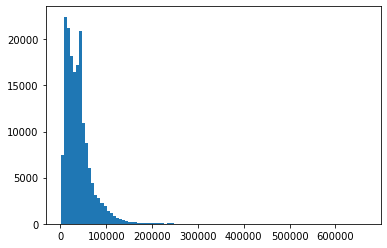

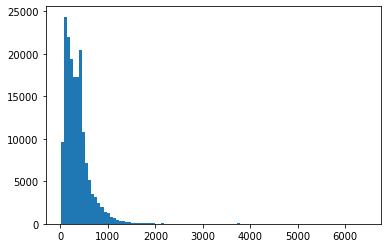

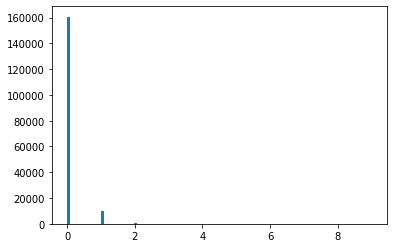

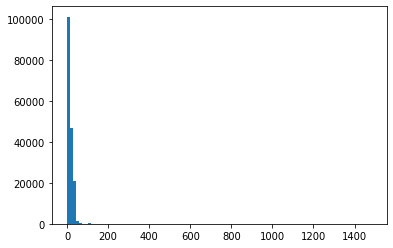

In [ ]:
import matplotlib.pyplot as plt

reviewed = ["grey" if "unreviewed" in entry["entryType"] else "gold" for entry in data["results"]]

mass = [entry["sequence"]["molWeight"] for entry in data["results"]]
plt.hist(mass, bins=100)
plt.show()

length = [entry["sequence"]["length"] for entry in data["results"]]
plt.hist(length, bins=100)
plt.show()

n_function = [len(entry.get("comments", [])) for entry in data["results"]]
plt.hist(n_function, bins=100)
plt.show()

score = [entry["annotationScore"] for entry in data["results"]]
plt.hist(score, bins=100)
plt.show()

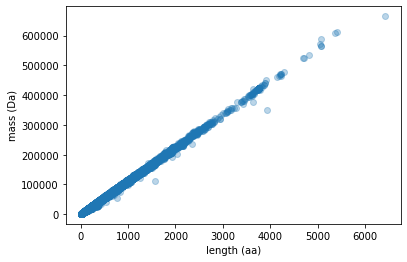

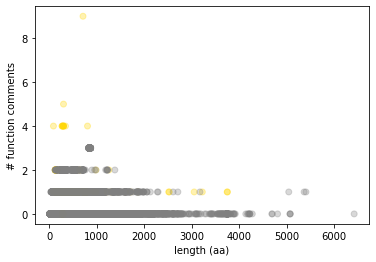

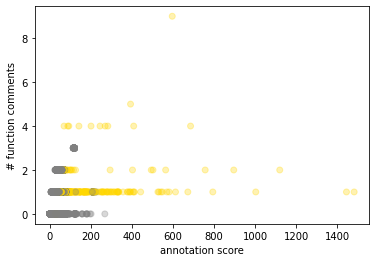

In [ ]:
plt.scatter(length, mass, alpha=0.3)
plt.xlabel("length (aa)")
plt.ylabel("mass (Da)")
plt.show()

plt.scatter(length, n_function, c=reviewed, alpha=0.3)
plt.xlabel("length (aa)")
plt.ylabel("# function comments")
plt.show()

plt.scatter(score, n_function, c=reviewed, alpha=0.3)
plt.xlabel("annotation score")
plt.ylabel("# function comments")
plt.show()